## Poisonous Mushroom Prediction

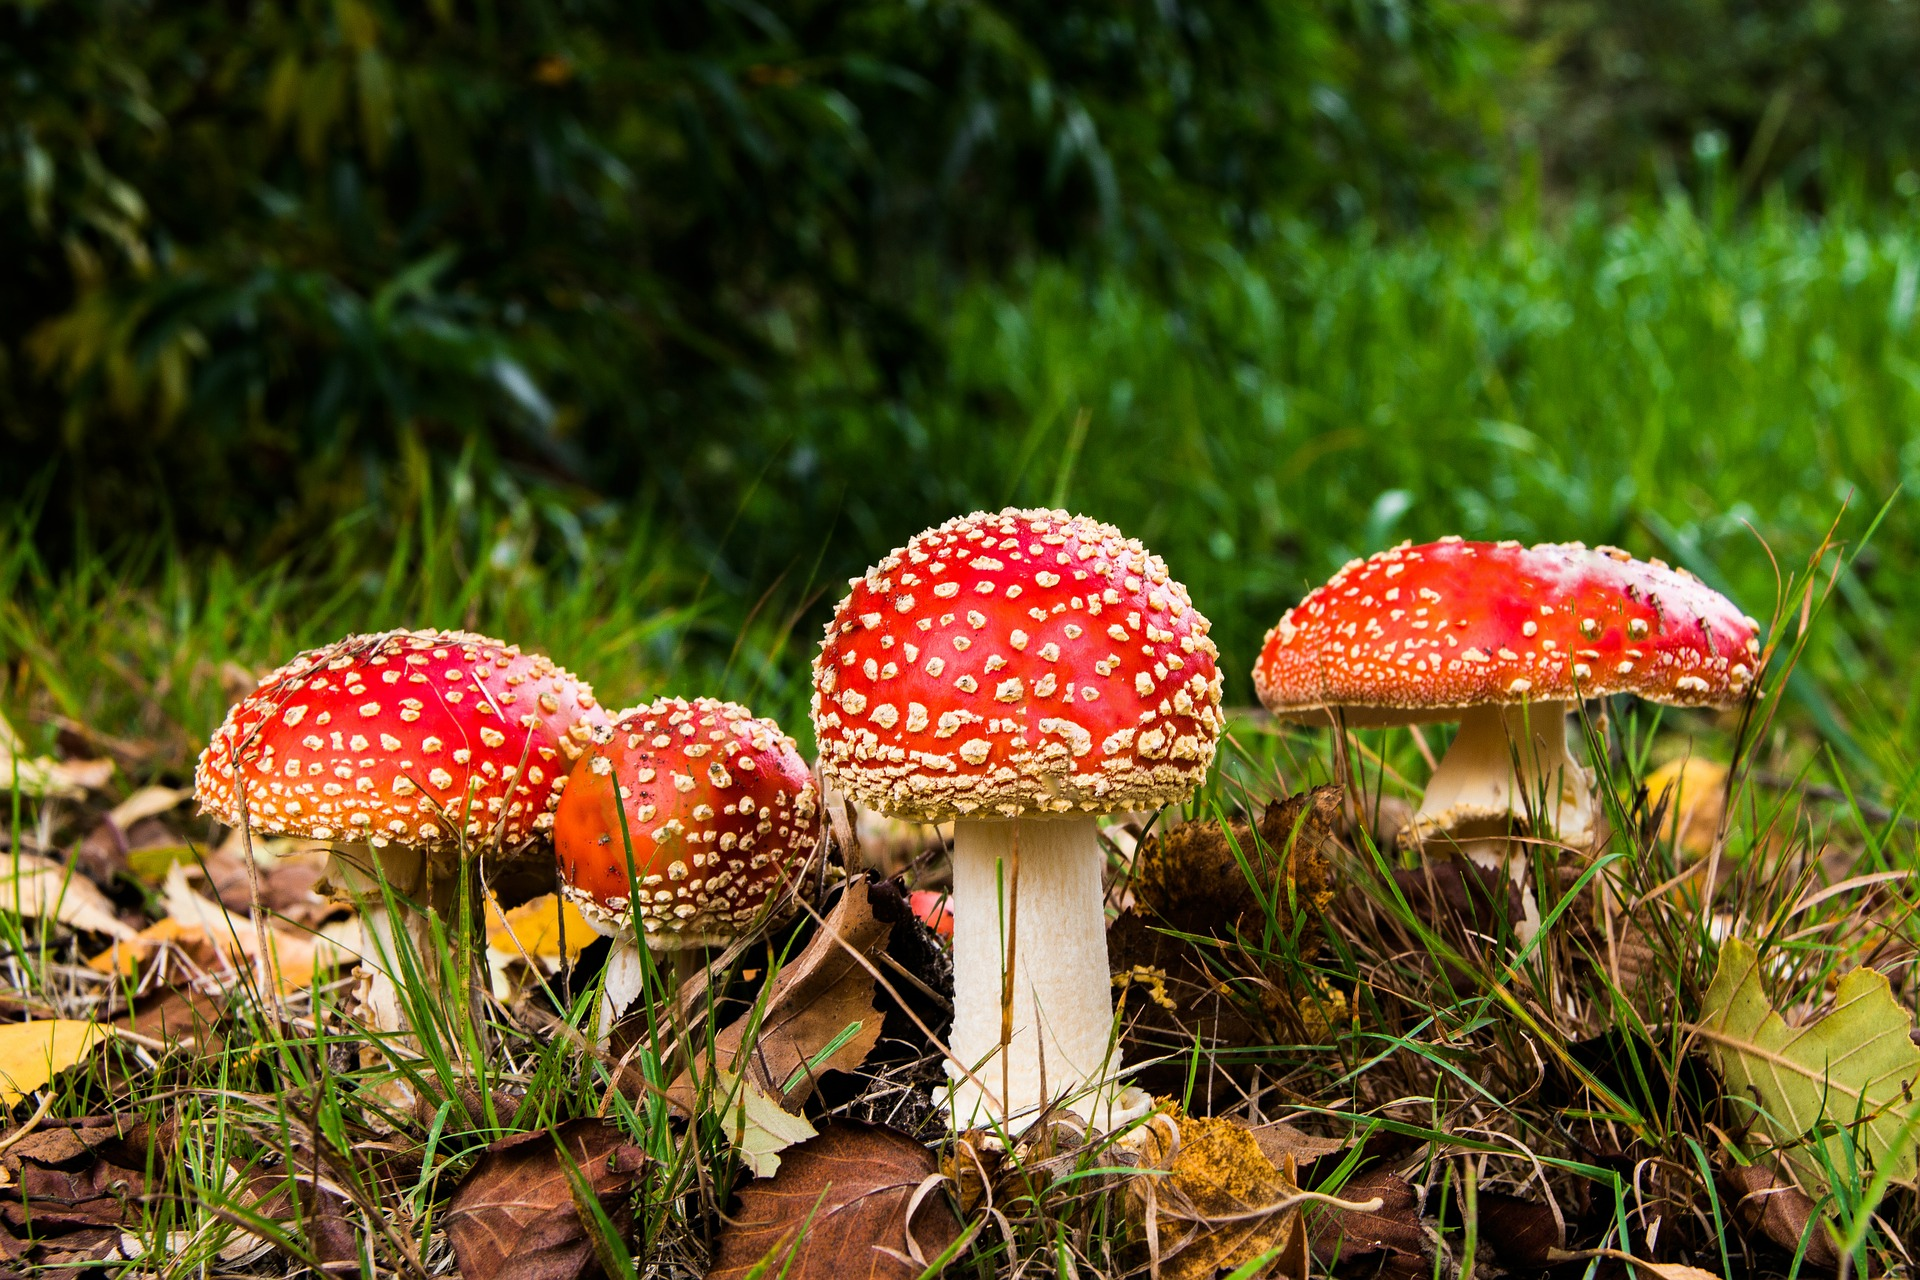

In [52]:
from IPython.display import display, Image
display(Image(filename='MushPic.jpeg'))

### The Dataset

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class). Of the 20 variables, 17 are nominal and 3 are metrical.



### Attribute Information:

attributes available in secondary_data.txt

#### Project Aims


To predict if a mushroom is either poisonous or not with only the above mentioned variables. 

Using RandomForestClassifier and ROC thresholds to achieve no False Positives.

### EDA

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
#import dataset
dataset = pd.read_csv('../raw_data/secondary_data.csv', sep=";", low_memory=False)

In [3]:
df = dataset.copy()

In [4]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [5]:
#profile = ProfileReport(df, title="Pandas Profilling Report", html={"style":{"full_width": True}})
#profile

### Insights:
- There are only 3 columns with numeric values, 2 boolean and 16 categorical.
- All of the numeric columns have strong correlation with each other.
- There is LOTSSS of missing data,with some having more than 80% missing values.

- Luckily, there is no missing data in the boolean or numeric columns.

So, I will need to drop some columns and have chosen to drop columns that have more than 40% of missing data.
- gill-spacing
- stem-root
- stem-surface
- veil-type
- veil-color 
- spore-print-color

In [6]:
drop_columns = ['gill-spacing', 'stem-root', 
                'stem-surface', 'veil-type', 
                'veil-color', 'spore-print-color']
df.drop(columns=drop_columns, inplace=True)

In [7]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

#### Turning the class column into binary

In [8]:
gender = {'p': 1,'e': 0}

df['class'] = [gender[item] for item in df['class']]

In [9]:
df['class'].value_counts()

1    33888
0    27181
Name: class, dtype: int64

### Splitting the data

In [10]:
X = df.drop(columns='class')
y = df['class']

In [11]:
X = OrdinalEncoder().fit_transform(X)
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,1,1,1,1,1,1,16.95,17.09,1,1,1,1,1
1,16.60,1,1,1,1,1,1,17.99,18.19,1,1,1,1,2
2,14.07,1,1,1,1,1,1,17.80,17.74,1,1,1,1,1
3,14.17,2,2,2,1,1,1,15.77,15.98,1,1,2,1,1
4,14.64,1,2,1,1,1,1,16.53,17.20,1,1,2,1,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Baseline Prediction 

In [13]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5536


### Random Forest Model

The parameters have been chosen based on a previous GridSearchCV that I ran previously to this section. 

It took more than 3 hours so I have skipped this step for the sake of saving time

In [14]:
params = {
    "n_estimators": [1000],
    "max_depth": [30],
    "criterion": ["gini"]
}

In [15]:
model_random_forest = GridSearchCV(
    RandomForestClassifier(random_state=12),
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [16]:
#model_random_forest.fit(X_train, y_train)

In [17]:
#with open ("model_random_forest_mushrooms.pkl", "wb") as m:
    #pickle.dump(model_random_forest, m)

### Save/Load model as rf_model

In [18]:
with open("model_random_forest_mushrooms.pkl", "rb") as input_file: 
    rf_model = pickle.load(input_file)

In [20]:
cv_results = pd.DataFrame(rf_model.cv_results_)
cv_results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,74.81723,18.850345,2.452944,0.52693,gini,30,1000,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.999795,0.999693,0.999693,0.999693,0.999693,0.999713,0.000041,1


#### Feature Importance

In [55]:
features = X_train.columns

importances = rf_model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances, index=features)

feat_imp.sort_values(ascending=False).head(5)

stem-width         0.131240
cap-surface        0.129728
gill-attachment    0.111682
stem-height        0.091989
gill-color         0.086448
dtype: float64

### Accuracy of Model

In [41]:
acc_test = rf_model.score(X_test, y_test)

In [23]:
print('best accuracy score is:', round(acc_test*100,2),'%')

best accuracy score is: 99.98 %


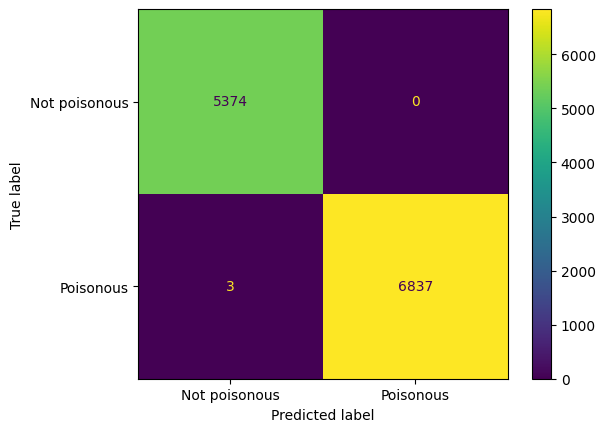

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=["Not poisonous", "Poisonous"]);

we have a slight problem. Although our model is 99.98% sucessful in predicting the correct class, it has missed 3 poisonous mushrooms which isn't acceptable for our model.

it is much more important to decrease the number of mislabeled Poisonous Mushrooms to Zero

### Adjusting the thresholds

In [25]:
probabilities = rf_model.predict_proba(X_train)
probabilities_df = pd.DataFrame(probabilities)
probabilities_df

,0,1
0,0.897,0.103
1,0.000,1.000
2,0.002,0.998
3,0.001,0.999
4,1.000,0.000
...,...,...
48850,0.001,0.999
48851,0.000,1.000
48852,0.000,1.000
48853,0.004,0.996


### Investigating ROC curve

In [27]:
fpr, tpr, threshold = roc_curve(y_train, probabilities[:,1])

In [29]:
roc_df = pd.DataFrame({"fpr":fpr,"tpr":tpr,"threshold":threshold})
roc_df.head(351)

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.564848,1.000000
2,0.000000,0.565957,0.999995
3,0.000000,0.567103,0.999991
4,0.000000,0.567768,0.999988
...,...,...,...
346,0.000000,1.000000,0.715000
347,0.000138,1.000000,0.209000
348,0.000229,1.000000,0.204000
349,0.001055,1.000000,0.155971


#### Defining the optimal threshold

In [31]:
optimum_threshold_value = roc_df.threshold[351]
optimum_threshold_value

0.13698837209302325

In [32]:
new_predictions = (probabilities_df.loc[:,1] >= optimum_threshold_value).astype("int")

In [33]:
print(f"Probability: {probabilities_df.loc[351, 1]}")
print(f"New Value: {new_predictions.loc[351]}")

Probability: 1.0
New Value: 1


In [34]:
cf_matrix = confusion_matrix(y_train, new_predictions)

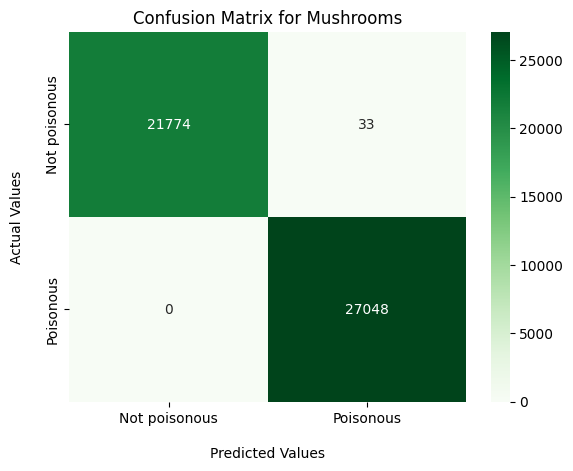

In [48]:
ax = sns.heatmap(cf_matrix, annot=True, cmap="Greens", fmt="g")

ax.set_title("Confusion Matrix for Mushrooms");
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values\n");

## Ticket labels
ax.xaxis.set_ticklabels(["Not Poisonous","Poisonous"])
ax.yaxis.set_ticklabels(["Not Poisonous","Poisonous"])

plt.show()

#### Test the new model on the test data

In [36]:
# Use the model to determine the probabilities.
probabilities_test_set = rf_model.predict_proba(X_test)

# Use the probabilities and the threshold to make the predictions.
predicted_test = (probabilities_test_set[:,1] >= optimum_threshold_value).astype("int")

In [37]:
matrix_test = confusion_matrix(y_test, predicted_test)

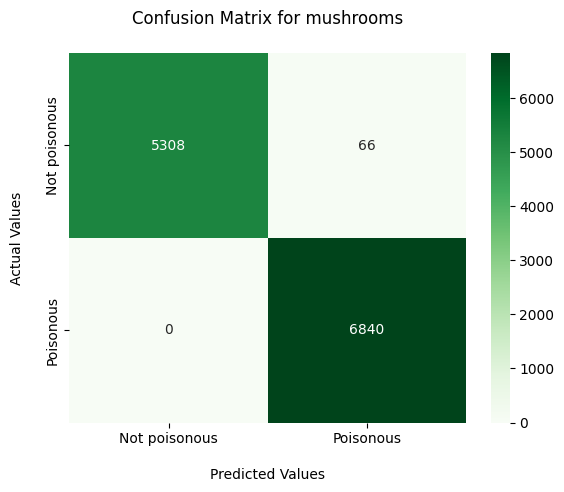

In [49]:
ax = sns.heatmap(matrix_test, annot=True, cmap="Greens", fmt="g")

ax.set_title("Confusion Matrix for Mushrooms\n");
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values\n");

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Not Poisonous","Poisonous"])
ax.yaxis.set_ticklabels(["Not Poisonous","Poisonous"])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Conclusion

Successfully implemented model with adjusted thresholds.

We have identified 100% of poisonous mushrooms!!!

Although we have incorrectly labeled some non-poisonous mushrooms as poisonous, it is much more important to discard these mushrooms for the sake of safety.